In [57]:
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.formula.api as smf

from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("files/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [62]:
def build_linreg_sklearn(df, columns, target='price', test_size=0.25, verbose=True, cross_validate=True):
    X = df[columns]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    linreg = LinearRegression()
    score = None
    if not cross_validate:
        linreg.fit(X_train, y_train)
        score = linreg.score(X_test, y_test)
    else:
        print(cross_val_score(linreg_cv, X, y, cv=5))
    if verbose:
        print("Using {}\nGives a score of {}".format(', '.join(columns), score))
    return linreg

In [65]:
linreg_cv = LinearRegression()
X = df[["sqft_living", "lat"]]
y = df["price"]
cross_val_score(linreg_cv, X, y, cv=5)

array([0.55415283, 0.55936634, 0.55787751, 0.57261564, 0.57921499])

In [64]:
linreg = build_linreg_sklearn(df, ["bathrooms", "sqft_living", "lat", 'condition'])

[0.55981607 0.56621937 0.56463971 0.58117734 0.58382921]
Using bathrooms, sqft_living, lat, condition
Gives a score of None


In [56]:
linreg = build_smlinreg(features=['sqft_living', 'lat', 'condition'], df=df)

----------------------------------------------------------------------------------------------------
features used = ['sqft_living', 'lat', 'condition']
formula: price~sqft_living+lat+condition
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     9636.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:53:27   Log-Likelihood:            -2.9822e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21593   BIC:                         5.965e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                

# Functions to automate testing of features

In [30]:
def build_formula(features=None, target="price"):
    formula = target + "~"
    features = "+".join(features)
    return formula+features

In [24]:
# testing build_formula on some features
build_formula(features=['sqft_living', 'bathroom', 'grade', 'lat'])

'price~sqft_living+bathroom+grade+lat'

In [25]:
def build_smlinreg(features=None, target="price", df=None):
    formula = build_formula(features=features, target=target)
    linreg = smf.ols(formula, df)
    linregfit = linreg.fit()
    print("-"*100)
    print("features used = {}".format(features))
    print("formula: {}".format(formula))
    print(linregfit.summary())
    print("-"*100)
    print("\n\n")
    return linreg

In [26]:
def test_column(column_name=None, df=df, test_size=0.25, target='price'):
    X = df[column_name]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    linreg = LinearRegression()
    linreg.fit(X_train.reshape(-1, 1), y_train)
    score = linreg.score(X_test.reshape(-1, 1), y_test)
    print("Score = {}".format(score))
    return linreg

In [37]:
def test_columns(columns=None, df=df, test_size=0.25, target='price'):
    X = df[columns]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    linreg = LinearRegression(normalize=True)
    linreg.fit(X_train, y_train)
    score = linreg.score(X_test, y_test)
    print("Score = {}".format(score))
    return linreg

In [38]:
def test_full_model(features=None, df=df, target='price', test_size=0.25):
    print("Building statsmodels linreg")
    smlinreg = build_smlinreg(features=features, target=target, df=df)
    print("\nBuilding sklearn linreg")
    linreg = test_columns(columns=features, df=df, test_size=test_size, target=target)
    return smlinreg, linreg

In [39]:
test_column(column_name='sqft_living')

Score = 0.47531928341409124


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
test_columns(['sqft_living', 'bathrooms', 'grade', 'lat'])

Score = 0.5971971845812789


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
build_smlinreg(features=['sqft_living', 'lat'], df=df)

----------------------------------------------------------------------------------------------------
features used = ['sqft_living', 'lat']
formula: price~sqft_living+lat
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:19   Log-Likelihood:            -2.9838e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21594   BIC:                         5.968e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err      

# Data Inspection

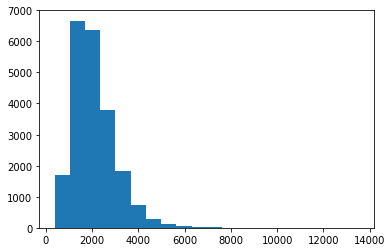

In [42]:
plt.hist(df.sqft_living, bins=20)
plt.show()

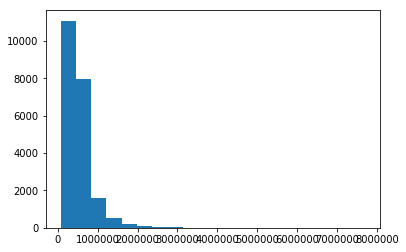

In [43]:
plt.hist(df.price, bins=20)
plt.show()

In [44]:
df["log_sqft_living"] = np.log(df.sqft_living)

(array([2.400e+01, 3.080e+02, 1.792e+03, 4.876e+03, 6.838e+03, 5.440e+03,
        1.987e+03, 2.930e+02, 3.400e+01, 5.000e+00]),
 array([5.91350301, 6.27349306, 6.63348311, 6.99347317, 7.35346322,
        7.71345328, 8.07344333, 8.43343338, 8.79342344, 9.15341349,
        9.51340355]),
 <a list of 10 Patch objects>)

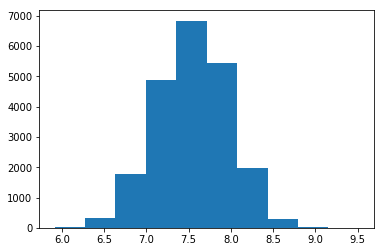

In [45]:
plt.hist(df.log_sqft_living)

In [46]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.001864
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.611839
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.621820
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.762135
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.954607
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.150102
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.367564
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.083380
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.245362
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.049620


In [47]:
# test sqft_living
test_column("sqft_living")

Score = 0.4766226545123472


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# test log_sqft_living
test_column("log_sqft_living")

Score = 0.3718533616927509


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# testing sqft_living and bedrooms
test_columns(["sqft_living", "bedrooms"])

Score = 0.4835261845871036


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [50]:
build_formula(features=["sqft_living", "bedrooms"], target="price")

'price~sqft_living+bedrooms'

In [51]:
df.log_sqft_living.round(5)

0        7.07327
1        7.85166
2        6.64639
3        7.58070
4        7.42655
5        8.59785
6        7.44717
7        6.96602
8        7.48437
9        7.54433
10       8.17752
11       7.05618
12       7.26543
13       7.22257
14       7.50108
15       7.98956
16       7.54433
17       7.37776
18       7.09008
19       7.13090
20       7.39018
21       8.02290
22       7.72754
23       6.97541
24       7.80384
25       7.44425
26       7.80384
27       7.24423
28       7.32647
29       7.85166
          ...   
21567    6.56526
21568    7.13887
21569    7.53369
21570    7.26543
21571    7.32647
21572    7.09838
21573    7.83992
21574    8.49903
21575    7.92660
21576    7.08171
21577    8.33567
21578    7.82405
21579    7.33302
21580    8.18869
21581    8.13447
21582    8.04495
21583    8.29155
21584    8.40514
21585    7.26193
21586    7.31322
21587    7.72754
21588    7.30653
21589    7.83201
21590    8.16337
21591    7.17778
21592    7.33302
21593    7.74500
21594    6.927

In [52]:
df["log_price"] = np.log(df.price)

In [53]:
features = ["sqft_living", "bedrooms", "grade", "condition", "log_sqft_living", "lat", "long"]
target = "log_price"

In [54]:
for feature_set in combinations(features, 4):
    if "log_sqft_living" not in feature_set or "sqft_living" not in feature_set:
        build_smlinreg(features=feature_set, target=target, df=df)

----------------------------------------------------------------------------------------------------
features used = ('sqft_living', 'bedrooms', 'grade', 'condition')
formula: log_price~sqft_living+bedrooms+grade+condition
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     7211.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:                -7630.6
No. Observations:               21597   AIC:                         1.527e+04
Df Residuals:                   21592   BIC:                         1.531e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                             

----------------------------------------------------------------------------------------------------
features used = ('sqft_living', 'grade', 'condition', 'long')
formula: log_price~sqft_living+grade+condition+long
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     7585.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:                -7315.4
No. Observations:               21597   AIC:                         1.464e+04
Df Residuals:                   21592   BIC:                         1.468e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                     

----------------------------------------------------------------------------------------------------
features used = ('bedrooms', 'grade', 'log_sqft_living', 'long')
formula: log_price~bedrooms+grade+log_sqft_living+long
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7032.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:                -7784.9
No. Observations:               21597   AIC:                         1.558e+04
Df Residuals:                   21592   BIC:                         1.562e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                               

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     9810.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:                -5606.9
No. Observations:               21597   AIC:                         1.122e+04
Df Residuals:                   21592   BIC:                         1.126e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -100.0776      1.981    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     9746.
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:52:27   Log-Likelihood:                -5652.8
No. Observations:               21597   AIC:                         1.132e+04
Df Residuals:                   21592   BIC:                         1.136e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -95.8126      1.991    -

In [21]:
smlinreg, linreg = test_full_model(features=['sqft_living', 'grade', 'lat'])

Building statsmodels linreg
----------------------------------------------------------------------------------------------------
features used = ['sqft_living', 'grade', 'lat']
formula: price~sqft_living+grade+lat
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.064e+04
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:14:07   Log-Likelihood:            -2.9759e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21593   BIC:                         5.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                      